# Rating Product & Sorting Reviews in Amazon

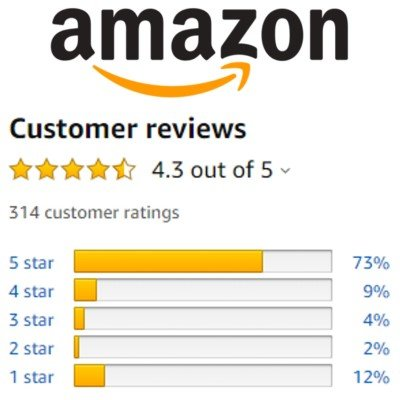

### Business Problem:

One of the most important problems in e-commerce is the correct calculation of the points given to the products after sales. The solution to this problem means providing greater customer satisfaction for the e-commerce site, prominence of the product for the sellers and a seamless shopping experience for the buyers. Another problem is the correct ordering of the comments given to the products. Since misleading comments will directly affect the sale of the product, it will cause both financial loss and loss of customers. In the solution of these 2 basic problems, e-commerce site and sellers will increase their sales, while customers will complete their purchasing journey without any problems.

#### Dataset Story:
This dataset containing Amazon Product Data includes product categories and various metadata. The product with the most comments in the electronics category has user ratings and comments.

Business Problem:
One of the most important problems in e-commerce is the correct calculation of the points given to the products after sales. The solution to this problem means providing greater customer satisfaction for the e-commerce site, prominence of the product for the sellers and a seamless shopping experience for the buyers. Another problem is the correct ordering of the comments given to the products. The prominence of misleading comments will cause both financial loss and loss of customers. In the solution of these 2 basic problems, while the e-commerce site and the sellers will increase their sales, the customers will complete the purchasing journey without any problems.

Dataset Story:
This dataset containing Amazon Product Data includes product categories and various metadata. The product with the most comments in the electronics category has user ratings and comments.

reviewerID:	User Id<br>
asin: Product Id<br>
reviewerName: User Name<br>
helpful: Useful Evaluation Degree<br>
reviewText:	Evaluation<br>
overall: Product Rating<br>
summary: Evaluation Summary<br>
unixReviewTime:	Evaluation Time<br>
reviewTime:	Evaluation Time {RAW}<br>
days - day_diff: Number of days since assessment<br>
helpful_yes: The number of times the evaluation was found useful<br>
total_vote:	Number of votes given to the evaluation<br>


## 1. Importing the Libraries and Uploading Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as st

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 15)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("amazon_review.csv")
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.000,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.000,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.000,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.000,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.000,best deal around,1373673600,2013-07-13,513,0,0


## 2. General Information About Dataset

In [3]:
# let's define a function for getting general information from a dataset.
def gen_info(df, box=True, column="day_diff"):
    print(30*"#" + "Shape".center(30) + 30*"#")
    print(df.shape)
    print("\n"+ 30*"#" + "Types".center(30) + 30*"#")
    print(df.dtypes)
    print("\n"+ 30*"#" + "Head".center(30) + 30*"#")
    print(df.head())
    print("\n"+ 30*"#" + "Tail".center(30) + 30*"#")
    print(df.tail())
    print("\n"+ 30*"#" + "Missing Values".center(30) + 30*"#")
    print(df.isnull().sum())
    print("\n"+ 30*"#" + "Quantiles".center(30) + 30*"#")
    print(df.describe([0.01, 0.05, 0.50, 0.95, 0.99]).T)
    print("\n"+ 30*"#" + "BOX PLOT".center(30) + 30*"#")
    if box == True:
        sns.boxplot(x=df[column])
        print(plt.show())

##############################            Shape             ##############################
(4915, 12)

##############################            Types             ##############################
reviewerID         object
asin               object
reviewerName       object
helpful            object
reviewText         object
overall           float64
summary            object
unixReviewTime      int64
reviewTime         object
day_diff            int64
helpful_yes         int64
total_vote          int64
dtype: object

##############################             Head             ##############################
       reviewerID        asin  reviewerName helpful                                         reviewText  overall                                 summary  unixReviewTime  reviewTime  day_diff  helpful_yes  total_vote
0  A3SBTW3WS4IQSN  B007WTAJTO           NaN  [0, 0]                                         No issues.    4.000                              Four Stars      1406073600  2014

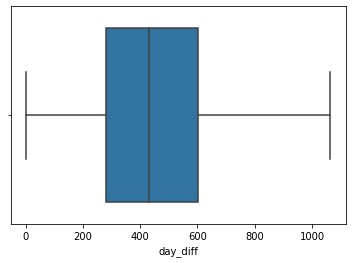

None


In [4]:
gen_info(df)

In [5]:
df.describe([0.01, 0.05, 0.50, 0.95, 0.99]).T # I did not like the image that comes out of the print

,count,mean,std,min,1%,5%,50%,95%,99%,max
overall,4915.000,4.588,0.997,1.000,1.000,2.000,5.000,5.000,5.000,5.000
unixReviewTime,4915.000,1379465001.668,15818574.323,1339200000.000,1347679296.000,1354492800.000,1381276800.000,1403308800.000,1404950400.000,1406073600.000
day_diff,4915.000,437.367,209.440,1.000,6.000,98.000,431.000,748.000,943.000,1064.000
helpful_yes,4915.000,1.311,41.619,0.000,0.000,0.000,0.000,1.000,3.000,1952.000
total_vote,4915.000,1.521,44.123,0.000,0.000,0.000,0.000,1.000,4.000,2020.000


## 3. Calculating the Average Rating according to the current comments and comparing it with the existing average rating

In [6]:
df["asin"].value_counts() # checking product id counts

B007WTAJTO    4915
Name: asin, dtype: int64

### 3.1 Calculating the Average Score of the Product

In [7]:
#Since it is a single product, I can directly take the average of given points and observe the average product rating.
df["overall"].mean()

4.587589013224822

### 3.2 Calculating the Weighted Average Score by Date.

In [8]:
# First, let's set the type of the 'reviewTime' variable to date.
df['reviewTime'] = df['reviewTime'].astype('datetime64[ns]')
df.dtypes

reviewerID                object
asin                      object
reviewerName              object
helpful                   object
reviewText                object
overall                  float64
summary                   object
unixReviewTime             int64
reviewTime        datetime64[ns]
day_diff                   int64
helpful_yes                int64
total_vote                 int64
dtype: object

In [9]:
# Let's make the analysis date today's date as the last date on which the evaluation was made.
analyse_date = df["reviewTime"].max()
analyse_date

Timestamp('2014-12-07 00:00:00')

Let's create a new variable by expressing the difference of each score/comment date and analyze_date in days. Then, we can divide the variable expressed in days by 4 with the quantile function and weight it according to the values from the quarters.

In [10]:
df['day_difference'] = (analyse_date - df['reviewTime']).dt.days
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,day_difference
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.000,Four Stars,1406073600,2014-07-23,138,0,0,137
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.000,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,408
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.000,nothing to really say....,1356220800,2012-12-23,715,0,0,714
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.000,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,381
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.000,best deal around,1373673600,2013-07-13,513,0,0,512


In [11]:
df['day_difference'].quantile([.25 , .50 , .75]) # Our quantile values

0.250   280.000
0.500   430.000
0.750   600.000
Name: day_difference, dtype: float64

In [12]:
print(df.loc[(df['day_difference'] <= 280) , 'overall'].mean())
print(df.loc[(df['day_difference'] > 280) & (df['day_difference'] <= 430) , 'overall'].mean())
print(df.loc[(df['day_difference'] > 430) & (df['day_difference'] <= 600) , 'overall'].mean())
print(df.loc[(df['day_difference'] > 600) , 'overall'].mean())

4.6957928802588995
4.636140637775961
4.571661237785016
4.4462540716612375


We see that the average of votes has increased over time.

### 3.3 Now let's write a function where we can get a weighted average based on time.

In [13]:
def weighted_sorting_score(dataframe , w1 = 28 , w2 = 26 , w3 = 24 , w4 = 22):
    return dataframe.loc[(dataframe['day_difference'] <= 280), 'overall'].mean() * w1 / 100 + \
        dataframe.loc[(dataframe['day_difference'] > 280) & (dataframe['day_difference'] <= 430) , 'overall'].mean() * w2 /100 + \
        dataframe.loc[(dataframe['day_difference'] > 430) & (dataframe['day_difference'] <= 600) , 'overall'].mean() * w3 / 100 + \
        dataframe.loc[(dataframe['day_difference'] > 600) , 'overall'].mean() * w4 / 100


In [14]:
weighted_sorting_score(df)

4.595593165128118

average Score: 4.587589013224822<br>
weighted average score over time: 4.595593165128118

## 4. Let's determine the 20 most effective reviews for the product to be displayed on the product detail page.

Generating the variable helpful_no:<br>
• total_vote is the total number of up-downs given to a comment.<br>
• up means helpful.<br>
• There is no helpful_no variable in the data set, it must be generated over existing variables.<br>
• We can find the unhelpful votes (helpful_no) by subtracting the number of useful votes (helpful_yes) from the total number of votes (total_vote).

In [15]:
# Generating the variable helpful_no.
df['helpful_no'] = df['total_vote'] - df['helpful_yes']

In [16]:
df.loc[df['helpful_no']>0].head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,day_difference,helpful_no
17,A1OATGH4DF0RF0,B007WTAJTO,Aaron F. Virginie,"[0, 1]",Class 10 Speed Rating for Seamless Full HD Vid...,5.000,Get Fast Load Times,1372896000,2013-04-07,610,0,1,609,1
26,A1U9QJQW3XPRL2,B007WTAJTO,Aaron T. Swain,"[1, 2]","I just received my card, it is the class 10 64...",5.000,64 GB,1343260800,2012-07-26,865,1,2,864,1
43,A1X1FX3NSOFCT3,B007WTAJTO,"Abused Commuter ""abused_commuter""","[0, 1]",Ordered this for a Galaxy S3. Lasted a few mo...,1.000,Beware... goes bad and takes your pics with it,1374278400,2013-07-20,506,0,1,505,1
70,AR4KV2Q28151J,B007WTAJTO,A discerning buyer,"[0, 1]",How do I praise extra memory? It fills my MP3 ...,5.000,"Good price, great product",1376956800,2013-08-20,475,0,1,474,1
75,A2KJY8F5O1U5D6,B007WTAJTO,A. Felson,"[1, 2]",works great on my sprint htc evo 4g lte. Form...,5.000,works great with htc evo 4g lte,1350259200,2012-10-15,784,1,2,783,1


### 4.1 score_pos_neg_diff, score_average_rating and wilson_lower_bound scores

Let's define score_pos_neg_diff, score_average_rating and wilson_lower_bound functions to calculate score_pos_neg_diff, score_average_rating and wilson_lower_bound scores.

#### 4.1.1 Up - Down Difference Score
We calculate it by subtracting the unhelpful comments from the helpful comments.

In [17]:
def score_pos_neg_diff(up , down):
    return up - down

In [18]:
df['score_pos_neg_diff'] = score_pos_neg_diff(df['helpful_yes'] , df['helpful_no'])
df.sort_values('score_pos_neg_diff' , ascending=False).head(20)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,day_difference,helpful_no,score_pos_neg_diff
2031,A12B7ZMXFI6IXY,B007WTAJTO,"Hyoun Kim ""Faluzure""","[1952, 2020]",[[ UPDATE - 6/19/2014 ]]So my lovely wife boug...,5.000,UPDATED - Great w/ Galaxy S4 & Galaxy Tab 4 10...,1367366400,2013-01-05,702,1952,2020,701,68,1884
4212,AVBMZZAFEKO58,B007WTAJTO,SkincareCEO,"[1568, 1694]",NOTE: please read the last update (scroll to ...,1.000,1 Star reviews - Micro SDXC card unmounts itse...,1375660800,2013-05-08,579,1568,1694,578,126,1442
3449,AOEAD7DPLZE53,B007WTAJTO,NLee the Engineer,"[1428, 1505]",I have tested dozens of SDHC and micro-SDHC ca...,5.000,Top of the class among all (budget-priced) mic...,1348617600,2012-09-26,803,1428,1505,802,77,1351
317,A1ZQAQFYSXL5MQ,B007WTAJTO,"Amazon Customer ""Kelly""","[422, 495]","If your card gets hot enough to be painful, it...",1.000,"Warning, read this!",1346544000,2012-02-09,1033,422,495,1032,73,349
3981,A1K91XXQ6ZEBQR,B007WTAJTO,"R. Sutton, Jr. ""RWSynergy""","[112, 139]",The last few days I have been diligently shopp...,5.000,"Resolving confusion between ""Mobile Ultra"" and...",1350864000,2012-10-22,777,112,139,776,27,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,A22GOZTFA02O2F,B007WTAJTO,"sb21 ""sb21""","[6, 6]",I used this for my Samsung Galaxy Tab 2 7.0 . ...,5.000,Used for my Samsung Galaxy Tab 2 7.0,1347321600,2012-11-09,759,6,6,758,0,6
2268,A680RUE1FDO8B,B007WTAJTO,Jerry Saperstein,"[8, 10]",My Samsung Galaxy S4 now has 119GB of fast mic...,5.000,Incredible simply incredible.,1395014400,2014-03-17,266,8,10,265,2,6
121,A2Z4VVF1NTJWPB,B007WTAJTO,A. Lee,"[5, 5]",Update: providing an update with regard to San...,5.000,ready for use on the Galaxy S3,1346803200,2012-05-09,943,5,5,942,0,5
323,A15X60NOGL3WDW,B007WTAJTO,"Amazon Customer ""Milo""","[6, 7]",I replaced a 64GB card in my note 3 with this ...,5.000,Working fine in my Note 3,1396310400,2014-01-04,338,6,7,337,1,5


When we list the top 20 observations according to the up - down difference score method, it is seen that the ranking is lower in some points where the rate of useful comments is higher. For this reason, it can be misleading to rank the comments according to their benefits with this method alone.

#### 4.1.2 Score Average Rating
We look at the ratio of the number of useful comments to all comments for that review.

In [19]:
def score_average_rating(up, down):
    if up + down == 0:
        return 0
    return up / (up + down)

In [20]:
df['score_average_rating'] = df.apply(lambda x: score_average_rating(x['helpful_yes'] , x['helpful_no']) , axis=1)
df.sort_values('score_average_rating' , ascending=False).head(20)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,day_difference,helpful_no,score_pos_neg_diff,score_average_rating
4277,A35KXSU6AD1481,B007WTAJTO,S. Q.,"[1, 1]",I have a galaxy note II and after rooting I no...,5.000,Perfect!!,1355875200,2012-12-19,719,1,1,718,0,1,1.000
2881,A3VSG5X7GPNNW6,B007WTAJTO,Lou Thomas,"[1, 1]",The Nexus One is listed as supporting a maximu...,5.000,Nexus One Loves This Card!,1349049600,2012-01-10,1063,1,1,1062,0,1,1.000
1073,A2ZXEKQ2OBZLEE,B007WTAJTO,C. Sanchez,"[1, 1]",I used it with my Samsung S4 and it works grea...,5.000,Tons of space for phone,1376352000,2013-08-13,482,1,1,481,0,1,1.000
445,AIWBDRNBODLEA,B007WTAJTO,"Apache ""Elizabeth""","[1, 1]",This is exactly what I was looking for to upgr...,4.000,Amazon Great Prices,1387324800,2013-12-18,355,1,1,354,0,1,1.000
3923,A2PH4RGYVR34L,B007WTAJTO,Rock Your Roots,"[1, 1]","It's a SanDisk, so what more is there to say? ...",5.000,What more to say?,1388361600,2013-12-30,343,1,1,342,0,1,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,A2TPXOZSU1DACQ,B007WTAJTO,Eskimo,"[7, 7]",I have always been a sandisk guy. This cards ...,5.000,Bet you wish you had one of these,1395792000,2014-03-26,257,7,7,256,0,7,1.000
402,A342LSQCE5UESO,B007WTAJTO,"Andrew R. Seiler ""bookfish""","[1, 1]",Arrived in manufacturers packaging so it looke...,5.000,"great, works well with galaxy s3",1348531200,2012-09-25,804,1,1,803,0,1,1.000
2226,AZKN9KO2ECFFZ,B007WTAJTO,JEFE,"[1, 1]",Put this in the Samsung S5. Works great. sto...,5.000,great memory,1402876800,2014-06-16,175,1,1,174,0,1,1.000
3901,A15ADZE1K9839O,B007WTAJTO,"Roberto K. Cho ""chorobe""","[1, 1]",UPDATE:I raised my star rating on this from 1 ...,4.000,Good while it lasted! BUT good customer support!,1363737600,2013-03-20,628,1,1,627,0,1,1.000


When we look at the 20 observations with the highest rate according to the score_average_rating method, we see that although their success rate is 100%, their frequency value is 1, which is quite misleading in terms of evaluation.

#### 4.1.3 Wilson Lower Bound Score

We observed the reasons why the Up - Down Difference Score and Score Average Rating methods can be misleading. Therefore, we will apply the Wilson Lower Bound Score method, where we can make the correct order without ignoring values such as frequency and ratio.

In [21]:
def wilson_lower_bound(up, down, confidence=0.95):
    """
    Calculate Wilson Lower Bound Score

    - The lower limit of the confidence interval to be calculated for the Bernoulli parameter p
    is accepted as the WLB score.
    - The score to be calculated is used for ranking.
    - Not:
    If the scores are between 1-5, 1-3 are marked as negative, 4-5 as positive and can be adjusted to Bernoulli.
    This brings with it some problems. For this reason, it is necessary to make a bayesian average rating.

    Parameters
    ----------
    up: int
        up count
    down: int
        down count
    confidence: float
        confidence

    Returns
    -------
    wilson score: float

    """
    n = up + down
    if n == 0:
        return 0
    z = st.norm.ppf(1 - (1 - confidence) / 2)
    phat = 1.0 * up / n
    return (phat + z * z / (2 * n) - z * math.sqrt((phat * (1 - phat) + z * z / (4 * n)) / n)) / (1 + z * z / n)


In [22]:
df["wilson_lower_bound"] = df.apply(lambda x: wilson_lower_bound(x["helpful_yes"], x["helpful_no"]), axis=1)
df.sort_values('wilson_lower_bound' , ascending=False).head(20)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,day_difference,helpful_no,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,A12B7ZMXFI6IXY,B007WTAJTO,"Hyoun Kim ""Faluzure""","[1952, 2020]",[[ UPDATE - 6/19/2014 ]]So my lovely wife boug...,5.000,UPDATED - Great w/ Galaxy S4 & Galaxy Tab 4 10...,1367366400,2013-01-05,702,1952,2020,701,68,1884,0.966,0.958
3449,AOEAD7DPLZE53,B007WTAJTO,NLee the Engineer,"[1428, 1505]",I have tested dozens of SDHC and micro-SDHC ca...,5.000,Top of the class among all (budget-priced) mic...,1348617600,2012-09-26,803,1428,1505,802,77,1351,0.949,0.937
4212,AVBMZZAFEKO58,B007WTAJTO,SkincareCEO,"[1568, 1694]",NOTE: please read the last update (scroll to ...,1.000,1 Star reviews - Micro SDXC card unmounts itse...,1375660800,2013-05-08,579,1568,1694,578,126,1442,0.926,0.912
317,A1ZQAQFYSXL5MQ,B007WTAJTO,"Amazon Customer ""Kelly""","[422, 495]","If your card gets hot enough to be painful, it...",1.000,"Warning, read this!",1346544000,2012-02-09,1033,422,495,1032,73,349,0.853,0.819
4672,A2DKQQIZ793AV5,B007WTAJTO,Twister,"[45, 49]",Sandisk announcement of the first 128GB micro ...,5.000,Super high capacity!!! Excellent price (on Am...,1394150400,2014-07-03,158,45,49,157,4,41,0.918,0.808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,A2O96COBMVY9C4,B007WTAJTO,Crysis Complex,"[5, 5]",What more can I say? The 64GB micro SD works f...,5.000,Works wonders for the Galaxy Note 2!,1349395200,2012-05-10,942,5,5,941,0,5,1.000,0.566
2583,A3MEPYZVTAV90W,B007WTAJTO,J. Wong,"[5, 5]",I bought this Class 10 SD card for my GoPro 3 ...,5.000,Works Great with a GoPro 3 Black!,1370649600,2013-08-06,489,5,5,488,0,5,1.000,0.566
121,A2Z4VVF1NTJWPB,B007WTAJTO,A. Lee,"[5, 5]",Update: providing an update with regard to San...,5.000,ready for use on the Galaxy S3,1346803200,2012-05-09,943,5,5,942,0,5,1.000,0.566
1142,A1PLHPPAJ5MUXG,B007WTAJTO,Daniel Pham(Danpham_X @ yahoo. com),"[5, 5]",As soon as I saw that this card was announced ...,5.000,Great large capacity card,1396396800,2014-02-04,307,5,5,306,0,5,1.000,0.566


When we rank according to the Wilson Lower Bound Score method, we see that the frequency and average values were taken into account and the ranking was much more accurate.

Hope it will be useful :)

[Linkedin](https://www.linkedin.com/in/demir-zumrut/)